In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.float_format', lambda x: '%.5f' % x)
# pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [23]:
df = pd.read_stata("/users/quasar/downloads/Dataset/Master_thesis_data/JEDC_dataset/10SD_jan15.dta")

In [24]:
US = df.loc[(df.Country == 'USA') & (df.Year >= 1956) & (df.Year <= 2004)]
US.head()

,Country,Regioncode,Region,Variable,Year,AGR,MIN,MAN,PU,CON,WRT,TRA,FIRE,GOV,OTH,SUM
5470,USA,NAM,North America,VA,1956,"18,287.05","11,542.08","115,220.67","9,487.89","18,804.86","83,710.95","31,814.63","77,484.53","68,149.55","8,685.82","443,188.02"
5471,USA,NAM,North America,VA,1957,"18,198.81","11,647.86","119,373.06","9,911.03","20,160.25","87,958.95","33,300.42","83,214.38","72,856.68","9,384.05","466,005.48"
5472,USA,NAM,North America,VA,1958,"20,303.46","10,742.89","112,620.79","9,740.70","21,603.83","89,535.11","32,687.37","89,864.19","77,496.24","9,896.34","474,490.92"
5473,USA,NAM,North America,VA,1959,"18,890.76","10,595.14","126,807.62","10,566.80","23,871.76","99,869.78","34,923.50","96,925.18","81,744.17","10,857.89","515,052.62"
5474,USA,NAM,North America,VA,1960,"19,829.78","10,876.37","128,808.36","10,806.16","26,105.18","103,229.52","36,082.55","103,981.73","86,946.79","11,569.58","538,236.02"


In [25]:
US_emp = US.loc[US.Variable == 'EMP']
US_VA = US.loc[US.Variable == 'VA']

In [26]:
# US sectoral Value added
US_VA['agri'] = US_VA.AGR
US_VA['manufacturing'] = US_VA.MIN + US_VA.MAN
US_VA['service'] = US_VA.PU + US_VA.CON + US_VA.WRT + US_VA.TRA + US_VA.FIRE + US_VA.GOV + US_VA.OTH
US_VA['agri_share'] = US_VA.AGR / US_VA.SUM
US_VA['manu_share'] = US_VA.manufacturing / US_VA.SUM
US_VA['service_share'] = US_VA.service / US_VA.SUM
US_VA = US_VA.set_index('Year')

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2074/3865558025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_VA['agri'] = US_VA.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2074/3865558025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_VA['manufacturing'] = US_VA.MIN + US_VA.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2074/3865558025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [27]:
# US sectoral employment  
US_emp['agri'] = US_emp.AGR
US_emp['manufacturing'] = US_emp.MIN + US_emp.MAN
US_emp['service'] = US_emp.PU + US_emp.CON + US_emp.WRT + US_emp.TRA + US_emp.FIRE + US_emp.GOV + US_emp.OTH
US_emp['agri_share'] = US_emp.AGR / US_emp.SUM
US_emp['manu_share'] = US_emp.manufacturing / US_emp.SUM
US_emp['service_share'] = US_emp.service / US_emp.SUM
US_emp = US_emp.set_index('Year')

/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2074/3075669558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_emp['agri'] = US_emp.AGR
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2074/3075669558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_emp['manufacturing'] = US_emp.MIN + US_emp.MAN
/var/folders/td/mlcv7n4s2r7619blwgv794mh0000gn/T/ipykernel_2074/3075669558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

<AxesSubplot:title={'center':'Sectoral Employment share'}, xlabel='Year'>

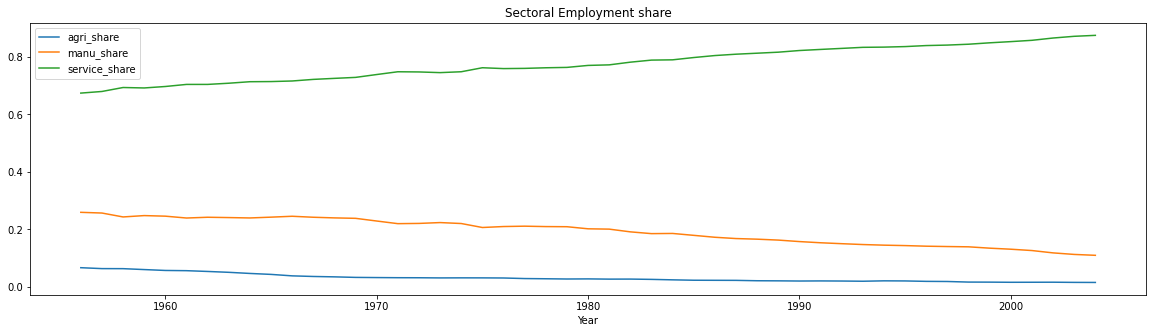

In [28]:
US_emp[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title = 'Sectoral Employment share')

<AxesSubplot:title={'center':'Sectoral Value added share'}, xlabel='Year'>

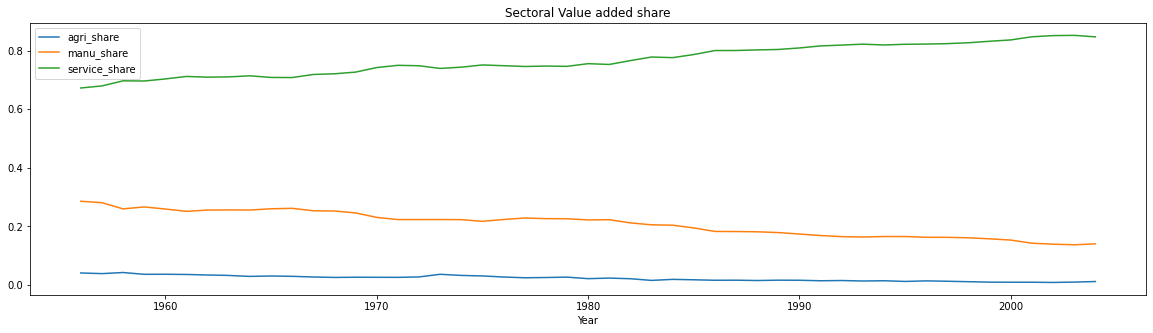

In [29]:
US_VA[['agri_share', 'manu_share', 'service_share']].plot(figsize = (20, 5), title = 'Sectoral Value added share')

In [31]:
agri_productivity_US = (US_VA['agri'] * 1000000) / (US_emp['agri'] * 1000) 
manu_productivity_US = (US_VA['manufacturing'] * 1000000) / (US_emp['manufacturing'] * 1000) 
service_productivity_US = (US_VA['service'] * 1000000) / (US_emp['service'] * 1000) 

In [52]:
prod_US = pd.DataFrame([agri_productivity_US, manu_productivity_US,service_productivity_US])
# prod_US = [[agri_productivity_US, manu_productivity_US,service_productivity_US]]
prod_US = prod_US.T

In [54]:
prod_US.head()

,agri,manufacturing,service
Year,,,
1956,"3,921.32","6,984.05","6,317.67"
1957,"4,080.94","7,257.76","6,629.32"
1958,"4,688.93","7,410.93","6,969.02"
1959,"4,496.16","7,928.78","7,416.28"
1960,"4,906.57","8,015.46","7,666.34"


<AxesSubplot:xlabel='Year'>

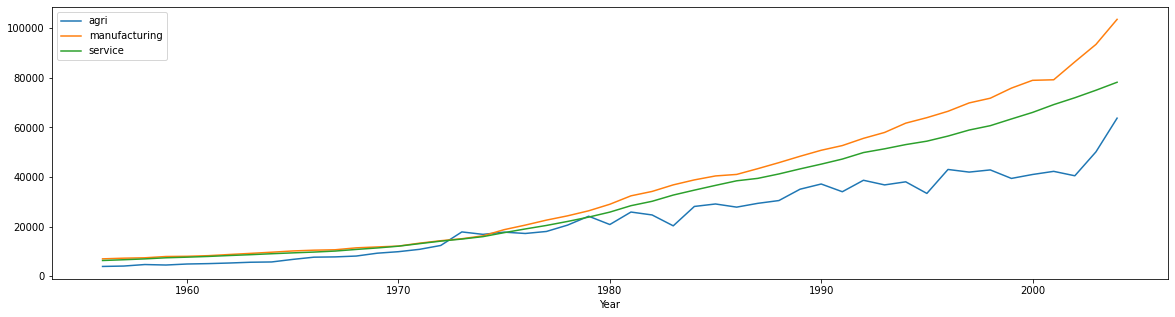

In [53]:
prod_US.plot(figsize =(20, 5))

In [64]:
prod_US.agri[1956]

3921.3222547016367

In [73]:
prod_US['agri_norm'] = prod_US.agri / prod_US.agri[1956]
prod_US['manu_norm'] = prod_US.manufacturing / prod_US.manufacturing[1956]
prod_US['service_norm'] = prod_US.service / prod_US.service[1956] 

In [74]:
prod_US

,agri,manufacturing,service,agri_norm,manu_norm,service_norm
Year,,,,,,
1956,"3,921.32","6,984.05","6,317.67",1.00,1.00,1.00
1957,"4,080.94","7,257.76","6,629.32",1.04,1.04,1.05
1958,"4,688.93","7,410.93","6,969.02",1.20,1.06,1.10
1959,"4,496.16","7,928.78","7,416.28",1.15,1.14,1.17
1960,"4,906.57","8,015.46","7,666.34",1.25,1.15,1.21
1961,"5,062.15","8,271.71","7,957.39",1.29,1.18,1.26
1962,"5,306.41","8,741.47","8,330.18",1.35,1.25,1.32
1963,"5,614.84","9,192.79","8,663.47",1.43,1.32,1.37
1964,"5,732.87","9,666.77","9,050.04",1.46,1.38,1.43


<AxesSubplot:title={'center':'Agriculture Productivity normalized'}, xlabel='Year'>

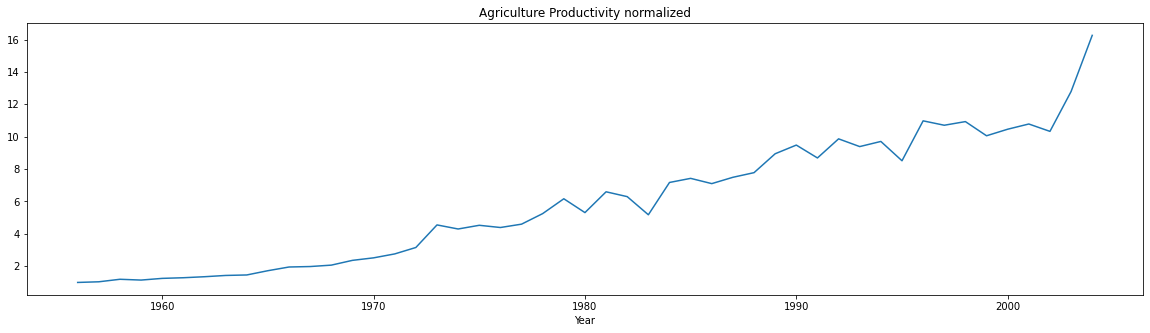

In [75]:
prod_US.agri_norm.plot(figsize = (20, 5), title = 'Agriculture Productivity normalized')

In [77]:
# TFP 
prod_US['agri_gamma'] = prod_US.agri.pct_change()
prod_US['manu_gamma'] = prod_US.manufacturing.pct_change()
prod_US['service_gamma'] = prod_US.service.pct_change()

In [78]:
prod_US.head()

,agri,manufacturing,service,agri_norm,manu_norm,service_norm,agri_gamma,manu_gamma,service_gamma
Year,,,,,,,,,
1956,"3,921.32","6,984.05","6,317.67",1.00,1.00,1.00,NaN,NaN,NaN
1957,"4,080.94","7,257.76","6,629.32",1.04,1.04,1.05,0.04,0.04,0.05
1958,"4,688.93","7,410.93","6,969.02",1.20,1.06,1.10,0.15,0.02,0.05
1959,"4,496.16","7,928.78","7,416.28",1.15,1.14,1.17,-0.04,0.07,0.06
1960,"4,906.57","8,015.46","7,666.34",1.25,1.15,1.21,0.09,0.01,0.03


In [82]:
# TFP
prod_US['agri_TFP'] = (1 + prod_US.agri.pct_change()).cumprod()
prod_US['manu_TFP'] = (1 + prod_US.manufacturing.pct_change()).cumprod()
prod_US['service_TFP'] = (1 + prod_US.service.pct_change()).cumprod()

In [86]:
prod_US

,agri,manufacturing,service,agri_norm,manu_norm,service_norm,agri_gamma,manu_gamma,service_gamma,agri_TFP,manu_TFP,service_TFP
Year,,,,,,,,,,,,
1956,"3,921.32","6,984.05","6,317.67",1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN
1957,"4,080.94","7,257.76","6,629.32",1.04,1.04,1.05,0.04,0.04,0.05,1.04,1.04,1.05
1958,"4,688.93","7,410.93","6,969.02",1.20,1.06,1.10,0.15,0.02,0.05,1.20,1.06,1.10
1959,"4,496.16","7,928.78","7,416.28",1.15,1.14,1.17,-0.04,0.07,0.06,1.15,1.14,1.17
1960,"4,906.57","8,015.46","7,666.34",1.25,1.15,1.21,0.09,0.01,0.03,1.25,1.15,1.21
1961,"5,062.15","8,271.71","7,957.39",1.29,1.18,1.26,0.03,0.03,0.04,1.29,1.18,1.26
1962,"5,306.41","8,741.47","8,330.18",1.35,1.25,1.32,0.05,0.06,0.05,1.35,1.25,1.32
1963,"5,614.84","9,192.79","8,663.47",1.43,1.32,1.37,0.06,0.05,0.04,1.43,1.32,1.37
1964,"5,732.87","9,666.77","9,050.04",1.46,1.38,1.43,0.02,0.05,0.04,1.46,1.38,1.43


<AxesSubplot:title={'center':'TFP growth rate'}, xlabel='Year'>

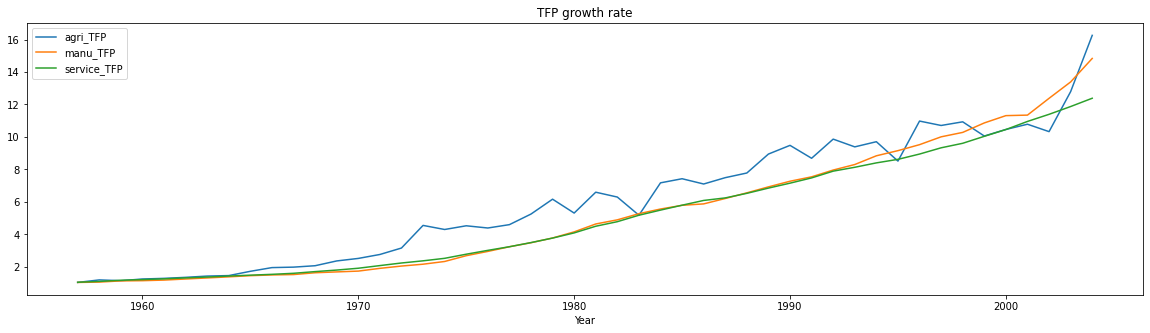

In [84]:
prod_US[['agri_TFP', 'manu_TFP', 'service_TFP']].plot(figsize = (20, 5), title ='TFP growth rate')

1. Normalize productivity levels to one in 1956
2. growth rate of sectoral value added per hour in the US to obtain the time paths of sectoral labour productivity 
3. $\gamma_{i, t}$ the gorwht rate of labour productivity in sector i at date t 

$$
A_{i, t+1} = (1 + \gamma_{i, t}) A_{i, t}
$$

Values of a, $\overline{a}$, $\overline{s}$, b, $\rho$

given values of $\rho$ and b, remaining other are calculated to match shares of hours in agriculture and manufcaturing in US using equation 7 and 8.

equation 7

from First order conditions for consumption imply that the labour input in agriculture is given by 

$$
L_a = (1 - a) \frac{\overline{a}}{A_a} + a(L + \frac{\overline{s}}{A_s})
$$

equation 8 

$$
L_m  = \frac{(L - L_a) + \overline{s} / A_s} {1 + x} 
$$

where 
$$
x = (\frac{b}{1-b})^{1/(\rho -1)} (\frac{A_m}{A_s})^{\rho/(\rho-1)}
$$

b and $\rho$ are jointly chosen to match as close as possible the shares of hours in manufacturing over time and the annualized growth rate of aggregate productivity. 

annualized growth rate of productivity in US between 1956 and 2004 is roughly 2% 


With positive productivity growth in all sectors, the shares of hours in agriculture converges to a in the long run.
Because the share of hours in agriculture has been falling systematically and was about 3% in 2004, we assume a long run share of 1%. 

a = 0.01 | Long-run share of hours in agriculture |

Calculate $\overline{a}$ from the equation 7

In [89]:
US_emp[['agri_share', 'manu_share', 'service_share']].head()

,agri_share,manu_share,service_share
Year,,,
1956,0.07,0.26,0.67
1957,0.06,0.26,0.68
1958,0.06,0.24,0.69
1959,0.06,0.25,0.69
1960,0.06,0.25,0.70


In [87]:
from scipy.optimize import curve_fit

In [88]:
L_a = 0.02
a = 0.01
A_a = 16.26
A_s = 12.38

In [ ]:
def equation_7():
